# Goals


### You will learn about the elements of quick prototyping


### You will study tranfer learning in least lines of code


### You will learn how to use your own data for transfer learning

# Why quick prototyping

    - Every image classification projects starts with the basic step of trying out transfer learning 
    
    - In transfer learning, you take a deep learning model trained on a very large dataset,
        - then train it further on your small dataset
    
    - While doing this you need to select a lot of hyper-params
        - First the model itself, like resnet or densenet, you can never be sure what to use
        - Then dataset parameters such as batch size, input shape, etc
        - Then model parameters such as freezing layers, not using pretrained models, et
        - Then setting up which optimizer, loss function, learning rate scheduler, etc to select
        - And finally the number of epochs to train on
        
     - Not everything can be done at the very first step, thus the quick prototyping mode. 
     
     - Which allows you to
         - set the model
         - whether to use pretrained network or train from scratch
         - number of epochs
         
     - All the other parameters are set to default as per their originl research papers
         - then can be changed in Monk's intermediate and expert modes (will be dealt later)
         
         
        

## Elements of deep learning
    - Training
    - Validation
    - Inferencing

# Table of Contents


## [0. Install](#0)


## [1. Importing mxnet-gluoncv backend](#1)


## [2. Creating and Managing experiments](#2)


## [3. Set dataset and select the model](#3)


## [4. See what other models Monk's mxnet backend supports](#4)


## [5. Train the classifier](#6)


## [6. Run the classifier through validation dataset](#7)


## [7. Running inference on test images](#8)

<a id='0'></a>
# Install Monk
  
 - git clone https://github.com/Tessellate-Imaging/monk_v1.git
 
 - cd monk_v1/installation && pip install -r requirements_cu9.txt
     - (Select the requirements file as per OS and CUDA version)

In [3]:
!git clone https://github.com/Tessellate-Imaging/monk_v1.git

Cloning into 'monk_v1'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 1922 (delta 8), reused 16 (delta 7), pack-reused 1905
Receiving objects: 100% (1922/1922), 69.95 MiB | 15.27 MiB/s, done.
Resolving deltas: 100% (1028/1028), done.


In [ ]:
# Select the requirements file as per OS and CUDA version
!cd monk_v1/installation && pip install -r requirements_cu9.txt

<a id='1'></a>
# Imports

In [1]:
# Monk
import os
import sys
sys.path.append("monk_v1/monk/");

In [2]:
#Using mxnet-gluon backend 
from gluon_prototype import prototype

<a id='2'></a>
# Creating and managing experiments
    - Provide project name
    - Provide experiment name
    - For a specific data create a single project
    - Inside each project multiple experiments can be created
    - Every experiment can be have diferent hyper-parameters attached to it

In [3]:
gtf = prototype(verbose=1);
gtf.Prototype("sample-project-1", "sample-experiment-1");

Mxnet Version: 1.5.0

Experiment Details
    Project: sample-project-1
    Experiment: sample-experiment-1
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/4_transfer_learning_quick_prototyping/1_intro_to_quick_prototyping/workspace/sample-project-1/sample-experiment-1/



### This creates files and directories as per the following structure
    
    
    workspace
        |
        |--------sample-project-1 (Project name can be different)
                        |
                        |
                        |-----sample-experiment-1 (Experiment name can be different)
                                    |
                                    |-----experiment-state.json
                                    |
                                    |-----output
                                            |
                                            |------logs (All training logs and graphs saved here)
                                            |
                                            |------models (all trained models saved here)
                                    

<a id='2'></a>
# Set dataset and select the model

## Quick mode training

    - Using Default Function
        - dataset_path
        - model_name
        - num_epochs
        
        
## Dataset folder structure

    parent_directory
        |
        |
        |------cats
                |
                |------img1.jpg
                |------img2.jpg
                |------.... (and so on)
        |------dogs
                |
                |------img1.jpg
                |------img2.jpg
                |------.... (and so on)     

## Modifyable params 
    - dataset_path: path to data
    - model_name: which pretrained model to use
    - freeze_base_network: Retrain already trained network or not
    - num_epochs: Number of epochs to train for

In [4]:
gtf.Default(dataset_path="monk_v1/monk/system_check_tests/datasets/dataset_cats_dogs_train", 
            model_name="resnet18_v1", 
            freeze_base_network=True,
            num_epochs=5);

#Read the summary generated once you run this cell. 

Dataset Details
    Train path:     monk_v1/monk/system_check_tests/datasets/dataset_cats_dogs_train
    Val path:       None
    CSV train path: None
    CSV val path:   None

Dataset Params
    Input Size:   224
    Batch Size:   4
    Data Shuffle: True
    Processors:   4
    Train-val split:   0.7

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 140
    Num val images:   60
    Num classes:      2

Model Params
    Model name:           resnet18_v1
    Use Gpu:              True
    Use pretrained:       True
    Freeze base network:  True

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           resnet18_v1
        Num of potentially trainable

monk_v1/monk/system/imports.py:193: UserWarning: ArgumentWarning: clipnorm and clipvalue are active only for keras in current version of Monk
  warnings.warn(msg)
monk_v1/monk/system/imports.py:193: UserWarning: ArgumentWarning: momentum_dampening_rate is active only for pytorch in current version of Monk
  warnings.warn(msg)


## From the summary above

    - Model Params
        Model name:           resnet18_v1
        Use Gpu:              True
        Use pretrained:       True
        Freeze base network:  True

<a id='4'></a>
# See what other models Monk's mxnet backend supports

In [6]:
gtf.List_Models();

Models List: 
    1. alexnet
    2. darknet53
    3. densenet121
    4. densenet161
    5. densenet169
    6. densenet201
    7. inceptionv3
    8. mobilenet1.0
    9. mobilenet0.75
    10. mobilenet0.25
    11. mobilenet0.5
    12. resnet18_v1
    13. resnet34_v1
    14. resnet50_v1
    15. resnet101_v1
    16. resnet152_v1
    17. resnext50_32x4d
    18. resnext101_32x4d
    19. resnext101_64x4d_v1
    20. se_resnext50_32x4d
    21. se_resnext101_32x4d
    22. se_resnext101_64x4d
    23. senet_154
    24. vgg11
    25. vgg13
    26. vgg16
    27. vgg19
    28. vgg11_bn
    29. vgg13_bn
    30. vgg16_bn
    31. vgg19_bn
    32. resnet18_v2
    33. resnet34_v2
    34. resnet50_v2
    35. resnet101_v2
    36. resnet152_v2
    37. mobilenetv2_1.0
    38. mobilenetv2_0.75
    39. mobilenetv2_0.5
    40. mobilenetv2_0.25
    41. squeezenet1.0
    42. squeezenet1.1
    43. mobilenetv3_large
    44. mobilenetv3_small
    45. resnet18_v1b
    46. resnet34_v1b
    47. resnet50_v1b
    48. resn

<a id='5'></a>
# Train the classifier

In [6]:
#Start Training
gtf.Train();

#Read the training summary generated once you run the cell and training is completed

Training Start
    Epoch 1/5
    ----------




    curr_lr - 0.01
    [Epoch 1] Train-acc: 0.657, Train-loss: 0.742 | Val-acc: 0.833333, Val-loss: 0.420, | time: 1.2 sec

    Epoch 2/5
    ----------




    curr_lr - 0.0098
    [Epoch 2] Train-acc: 0.750, Train-loss: 0.578 | Val-acc: 0.650000, Val-loss: 0.949, | time: 1.1 sec

    Epoch 3/5
    ----------




    curr_lr - 0.009604
    [Epoch 3] Train-acc: 0.814, Train-loss: 0.493 | Val-acc: 0.633333, Val-loss: 1.169, | time: 1.1 sec

    Epoch 4/5
    ----------




    curr_lr - 0.009411919999999999
    [Epoch 4] Train-acc: 0.800, Train-loss: 0.487 | Val-acc: 0.733333, Val-loss: 0.621, | time: 1.1 sec

    Epoch 5/5
    ----------




    curr_lr - 0.009223681599999999
    [Epoch 5] Train-acc: 0.814, Train-loss: 0.564 | Val-acc: 0.850000, Val-loss: 0.352, | time: 1.3 sec

    Training completed in: 0m 5s
    Best val Acc:          0.850000

Training End

Training Outputs
    Model Dir:   /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/quick_prototyping/1_intro_to_quick_prototyping/workspace/sample-project-1/sample-experiment-1/output/models/
    Log Dir:     /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/quick_prototyping/1_intro_to_quick_prototyping/workspace/sample-project-1/sample-experiment-1/output/logs/
    Final model: final
    Best model:  best_model
    Log 1 - Validation accuracy history log: val_acc_history.npy
    Log 2 - Validation loss history log:     val_loss_history.npy
    Log 3 - Training accuracy history log:   train_acc_history.npy
    Log 4 - Training loss history log:

<Figure size 432x288 with 0 Axes>

<a id='6'></a>
# Validating the trained classifier

## Load the experiment in validation mode
    - Set flag eval_infer as True

In [7]:
gtf = prototype(verbose=1);
gtf.Prototype("sample-project-1", "sample-experiment-1", eval_infer=True);

Mxnet Version: 1.5.1

Model Details
    Loading model - workspace/sample-project-1/sample-experiment-1/output/models/final-symbol.json
    Model loaded!

Experiment Details
    Project: sample-project-1
    Experiment: sample-experiment-1
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/quick_prototyping/1_intro_to_quick_prototyping/workspace/sample-project-1/sample-experiment-1/



## Load the validation dataset

In [8]:
gtf.Dataset_Params(dataset_path="monk_v1/monk/system_check_tests/datasets/dataset_cats_dogs_eval");
gtf.Dataset();

Dataset Details
    Test path:      monk_v1/monk/system_check_tests/datasets/dataset_cats_dogs_eval
    CSV test path:  None

Dataset Params
    Input Size:  224
    Processors:   4

Pre-Composed Test Transforms
[{'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num test images: 50
    Num classes:      2



## Run validation

In [9]:
accuracy, class_based_accuracy = gtf.Evaluate();

Testing



    Result
        class based accuracies
            0. cat - 100.0 %
            1. dog - 92.0 %
        total images:            50
        num correct predictions: 48
        Average accuracy (%):    96.0




<a id='7'></a>
# Running inference on test images

## Load the experiment in inference mode
    - Set flag eval_infer as True

In [10]:
gtf = prototype(verbose=1);
gtf.Prototype("sample-project-1", "sample-experiment-1", eval_infer=True);

Mxnet Version: 1.5.1

Model Details
    Loading model - workspace/sample-project-1/sample-experiment-1/output/models/final-symbol.json
    Model loaded!

Experiment Details
    Project: sample-project-1
    Experiment: sample-experiment-1
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/quick_prototyping/1_intro_to_quick_prototyping/workspace/sample-project-1/sample-experiment-1/



## Select image and Run inference

Prediction
    Image name:         monk_v1/monk/system_check_tests/datasets/dataset_cats_dogs_test/0.jpg
    Predicted class:      cat
    Predicted score:      2.123032331466675



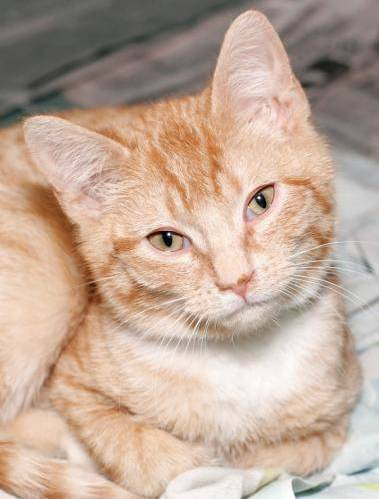

In [11]:
img_name = "monk_v1/monk/system_check_tests/datasets/dataset_cats_dogs_test/0.jpg";
predictions = gtf.Infer(img_name=img_name);

#Display 
from IPython.display import Image
Image(filename=img_name) 

Prediction
    Image name:         monk_v1/monk/system_check_tests/datasets/dataset_cats_dogs_test/90.jpg
    Predicted class:      dog
    Predicted score:      -0.34706512093544006



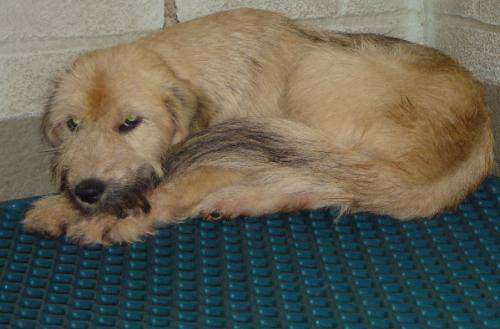

In [12]:
img_name = "monk_v1/monk/system_check_tests/datasets/dataset_cats_dogs_test/90.jpg";
predictions = gtf.Infer(img_name=img_name);

#Display 
from IPython.display import Image
Image(filename=img_name) 